## Correlação e Coeficiente de Determinação

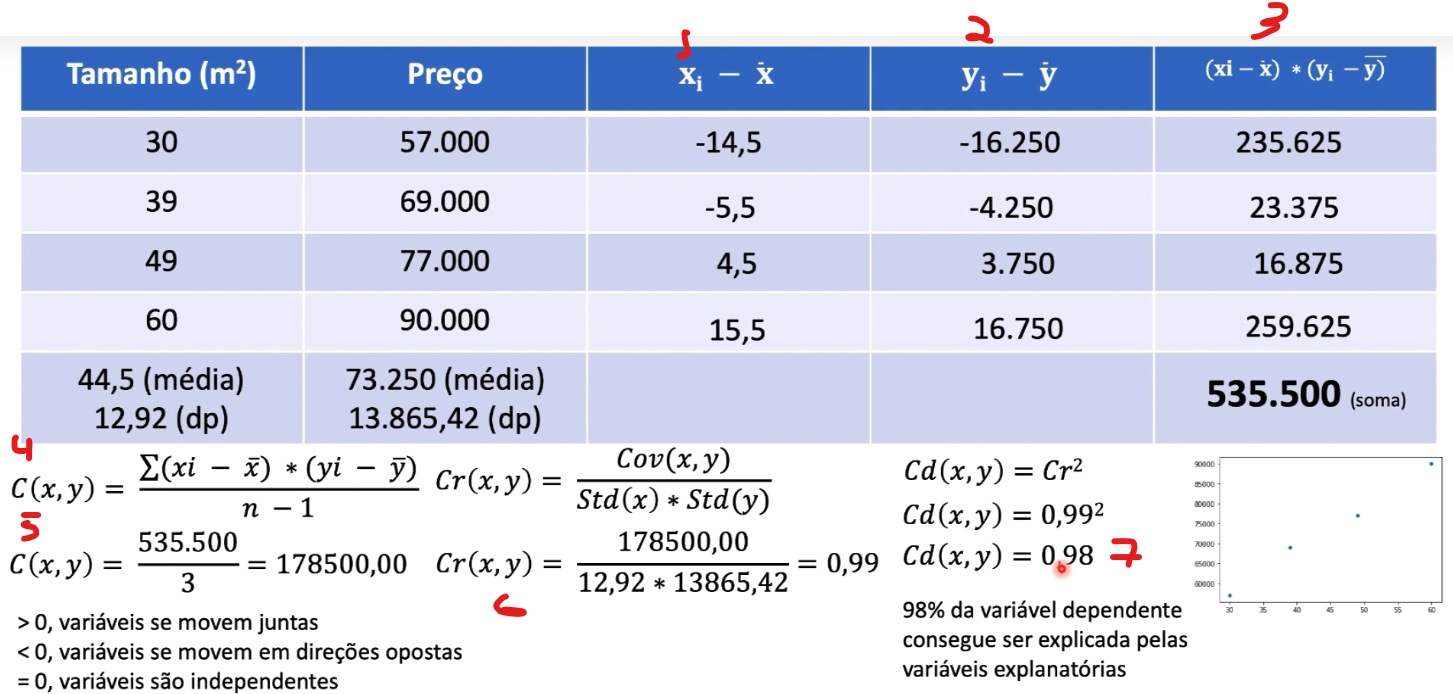

1° passo é descobrir a covariância (mede a variação com base no desvio padrão)

2° passo encontrar o coeficiente de correlação

3° passo encontrar o coeficiente de determinação

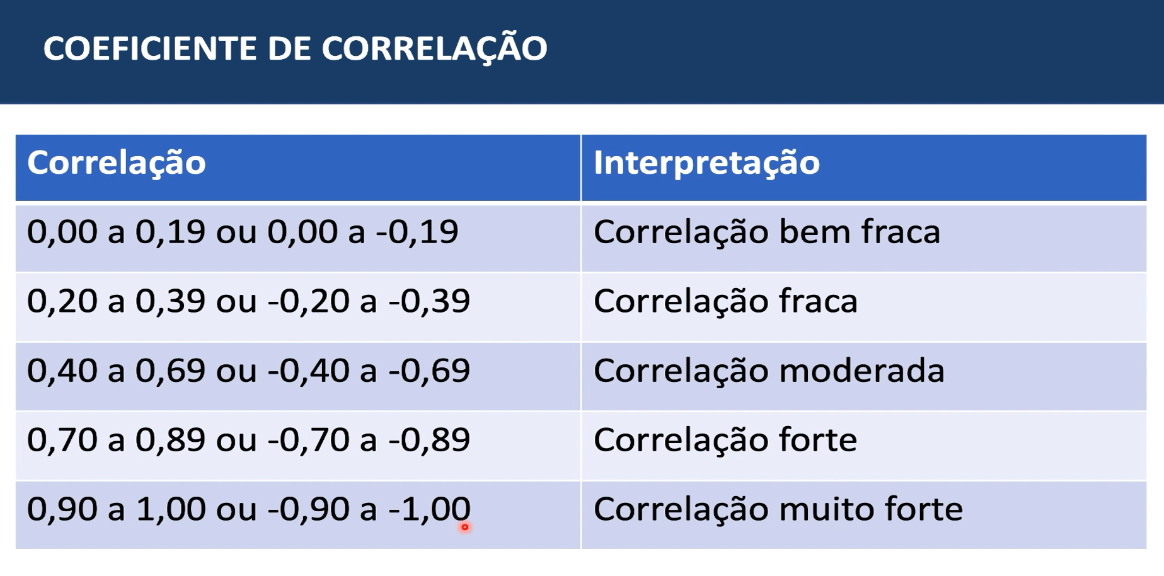

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import math

### Dados

In [103]:
tamanho = np.array([30, 39, 49, 60])
preco = np.array([57000, 69000, 77000, 90000])

In [104]:
dataset = pd.DataFrame({'tamanho': tamanho, 'preco': preco})
dataset

tamanho  preco
0       30  57000
1       39  69000
2       49  77000
3       60  90000

In [105]:
media_tamanho = dataset['tamanho'].mean()
media_preco = dataset['preco'].mean()
media_tamanho, media_preco

(44.5, 73250.0)

In [106]:
dp_tamanho = dataset['tamanho'].std()
dp_preco = dataset['preco'].std()
dp_tamanho, dp_preco

(12.922847983320086, 13865.424623862047)

#### Calculo Manual

In [107]:
dataset['dif'] = (dataset['tamanho'] - media_tamanho) * (dataset['preco'] - media_preco)
dataset

tamanho  preco       dif
0       30  57000  235625.0
1       39  69000   23375.0
2       49  77000   16875.0
3       60  90000  259625.0

In [108]:
soma_dif = dataset['dif'].sum()
soma_dif

535500.0

In [109]:
dataset['soma_dif']=soma_dif

In [110]:
dataset['covariancia']=soma_dif/ (len(dataset)-1)

In [111]:
dataset['coef_corr']=dataset['covariancia']/(dp_tamanho * dp_preco)
dataset['coef_det']=math.pow(dataset['coef_corr'][0],2) #pegar apenas um valor
dataset

tamanho  preco       dif  soma_dif  covariancia  coef_corr  coef_det
0       30  57000  235625.0  535500.0     178500.0   0.996201  0.992416
1       39  69000   23375.0  535500.0     178500.0   0.996201  0.992416
2       49  77000   16875.0  535500.0     178500.0   0.996201  0.992416
3       60  90000  259625.0  535500.0     178500.0   0.996201  0.992416

In [112]:
dataset

tamanho  preco       dif  soma_dif  covariancia  coef_corr  coef_det
0       30  57000  235625.0  535500.0     178500.0   0.996201  0.992416
1       39  69000   23375.0  535500.0     178500.0   0.996201  0.992416
2       49  77000   16875.0  535500.0     178500.0   0.996201  0.992416
3       60  90000  259625.0  535500.0     178500.0   0.996201  0.992416

<AxesSubplot: >

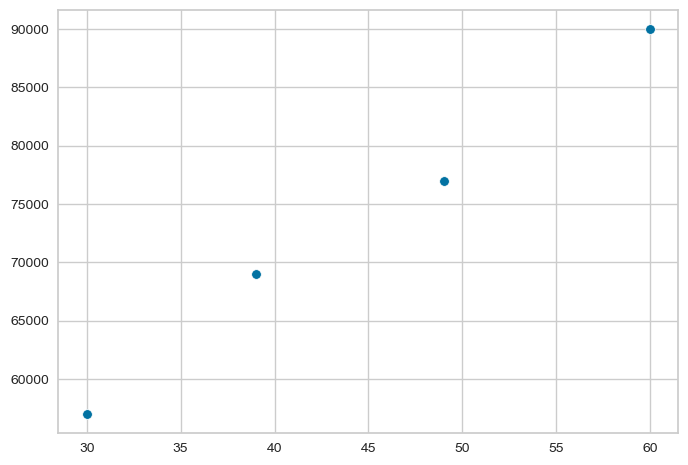

In [113]:
sns.scatterplot(x=tamanho,y=preco)

#### Calculo Numpy e Pandas

In [114]:
dataset[['tamanho','preco']].corr() # tira a correlacao entre as colunas

tamanho     preco
tamanho  1.000000  0.996201
preco    0.996201  1.000000

<AxesSubplot: >

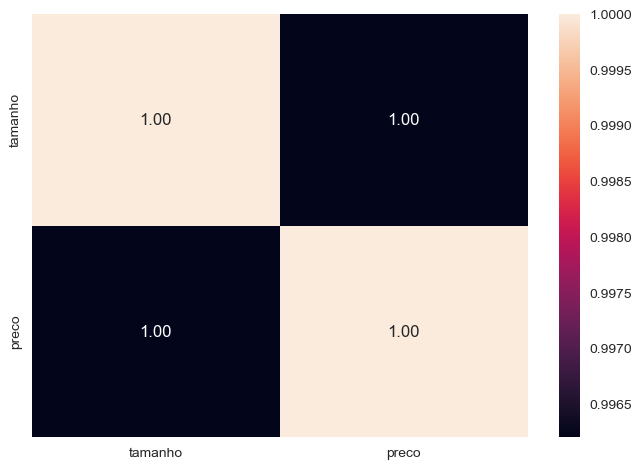

In [115]:
sns.heatmap(dataset[['tamanho','preco']].corr() ,annot=True,fmt='.2f')

### Exercício - correlação base de dados preço das casas

In [116]:
dataset = pd.read_csv('data_base/house_prices.csv')
dataset.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [117]:
dataset.drop(labels = ['id', 'date', 'sqft_living', 'sqft_lot'], axis = 1, inplace=True)
dataset.head()

price  bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0  221900.0         3       1.00     1.0           0     0          3      7   
1  538000.0         3       2.25     2.0           0     0          3      7   
2  180000.0         2       1.00     1.0           0     0          3      6   
3  604000.0         4       3.00     1.0           0     0          5      7   
4  510000.0         3       2.00     1.0           0     0          3      8   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        1180              0      1955             0    98178  47.5112   
1        2170            400      1951          1991    98125  47.7210   
2         770              0      1933             0    98028  47.7379   
3        1050            910      1965             0    98136  47.5208   
4        1680              0      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  
0 -122.257           1340        5650  
1 -122.319           1690        7639  
2 -122.233           2720        8062  
3 -122.393           1360        5000  
4 -122.045           1800        7503

In [118]:
dataset.corr()

price  bedrooms  bathrooms    floors  waterfront      view  \
price          1.000000  0.308350   0.525138  0.256794    0.266369  0.397293   
bedrooms       0.308350  1.000000   0.515884  0.175429   -0.006582  0.079532   
bathrooms      0.525138  0.515884   1.000000  0.500653    0.063744  0.187737   
floors         0.256794  0.175429   0.500653  1.000000    0.023698  0.029444   
waterfront     0.266369 -0.006582   0.063744  0.023698    1.000000  0.401857   
view           0.397293  0.079532   0.187737  0.029444    0.401857  1.000000   
condition      0.036362  0.028472  -0.124982 -0.263768    0.016653  0.045990   
grade          0.667434  0.356967   0.664983  0.458183    0.082775  0.251321   
sqft_above     0.605567  0.477600   0.685342  0.523885    0.072075  0.167649   
sqft_basement  0.323816  0.303093   0.283770 -0.245705    0.080588  0.276947   
yr_built       0.054012  0.154178   0.506019  0.489319   -0.026161 -0.053440   
yr_renovated   0.126434  0.018841   0.050739  0.006338    0.092885  0.103917   
zipcode       -0.053203 -0.152668  -0.203866 -0.059121    0.030285  0.084827   
lat            0.307003 -0.008931   0.024573  0.049614   -0.014274  0.006157   
long           0.021626  0.129473   0.223042  0.125419   -0.041910 -0.078400   
sqft_living15  0.585379  0.391638   0.568634  0.279885    0.086463  0.280439   
sqft_lot15     0.082447  0.029244   0.087175 -0.011269    0.030703  0.072575   

               condition     grade  sqft_above  sqft_basement  yr_built  \
price           0.036362  0.667434    0.605567       0.323816  0.054012   
bedrooms        0.028472  0.356967    0.477600       0.303093  0.154178   
bathrooms      -0.124982  0.664983    0.685342       0.283770  0.506019   
floors         -0.263768  0.458183    0.523885      -0.245705  0.489319   
waterfront      0.016653  0.082775    0.072075       0.080588 -0.026161   
view            0.045990  0.251321    0.167649       0.276947 -0.053440   
condition       1.000000 -0.144674   -0.158214       0.174105 -0.361417   
grade          -0.144674  1.000000    0.755923       0.168392  0.446963   
sqft_above     -0.158214  0.755923    1.000000      -0.051943  0.423898   
sqft_basement   0.174105  0.168392   -0.051943       1.000000 -0.133124   
yr_built       -0.361417  0.446963    0.423898      -0.133124  1.000000   
yr_renovated   -0.060618  0.014414    0.023285       0.071323 -0.224874   
zipcode         0.003026 -0.184862   -0.261190       0.074845 -0.346869   
lat            -0.014941  0.114084   -0.000816       0.110538 -0.148122   
long           -0.106500  0.198372    0.343803      -0.144765  0.409356   
sqft_living15  -0.092824  0.713202    0.731870       0.200355  0.326229   
sqft_lot15     -0.003406  0.119248    0.194050       0.017276  0.070958   

               yr_renovated   zipcode       lat      long  sqft_living15  \
price              0.126434 -0.053203  0.307003  0.021626       0.585379   
bedrooms           0.018841 -0.152668 -0.008931  0.129473       0.391638   
bathrooms          0.050739 -0.203866  0.024573  0.223042       0.568634   
floors             0.006338 -0.059121  0.049614  0.125419       0.279885   
waterfront         0.092885  0.030285 -0.014274 -0.041910       0.086463   
view               0.103917  0.084827  0.006157 -0.078400       0.280439   
condition         -0.060618  0.003026 -0.014941 -0.106500      -0.092824   
grade              0.014414 -0.184862  0.114084  0.198372       0.713202   
sqft_above         0.023285 -0.261190 -0.000816  0.343803       0.731870   
sqft_basement      0.071323  0.074845  0.110538 -0.144765       0.200355   
yr_built          -0.224874 -0.346869 -0.148122  0.409356       0.326229   
yr_renovated       1.000000  0.064357  0.029398 -0.068372      -0.002673   
zipcode            0.064357  1.000000  0.267048 -0.564072      -0.279033   
lat                0.029398  0.267048  1.000000 -0.135512       0.048858   
long              -0.068372 -0.564072 -0.135512  1.000000       0.334605   
sqft_livin

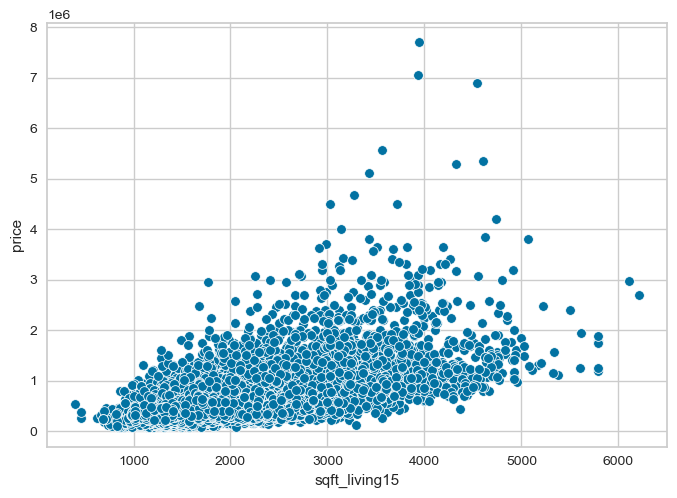

In [119]:
sns.scatterplot(x=dataset['sqft_living15'], y=dataset['price']);

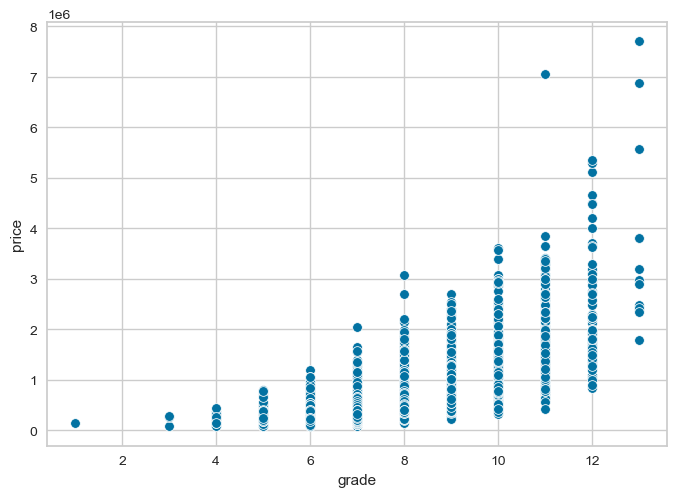

In [120]:
sns.scatterplot(x=dataset['grade'], y=dataset['price']);

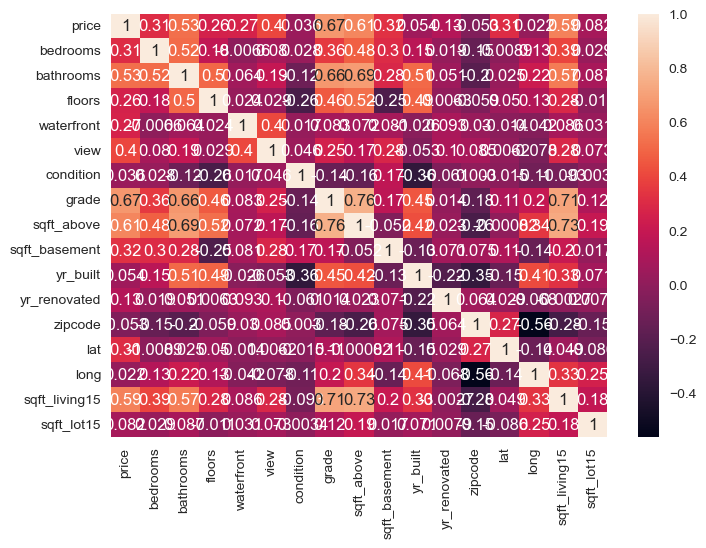

In [121]:
sns.heatmap(dataset.corr(), annot=True);

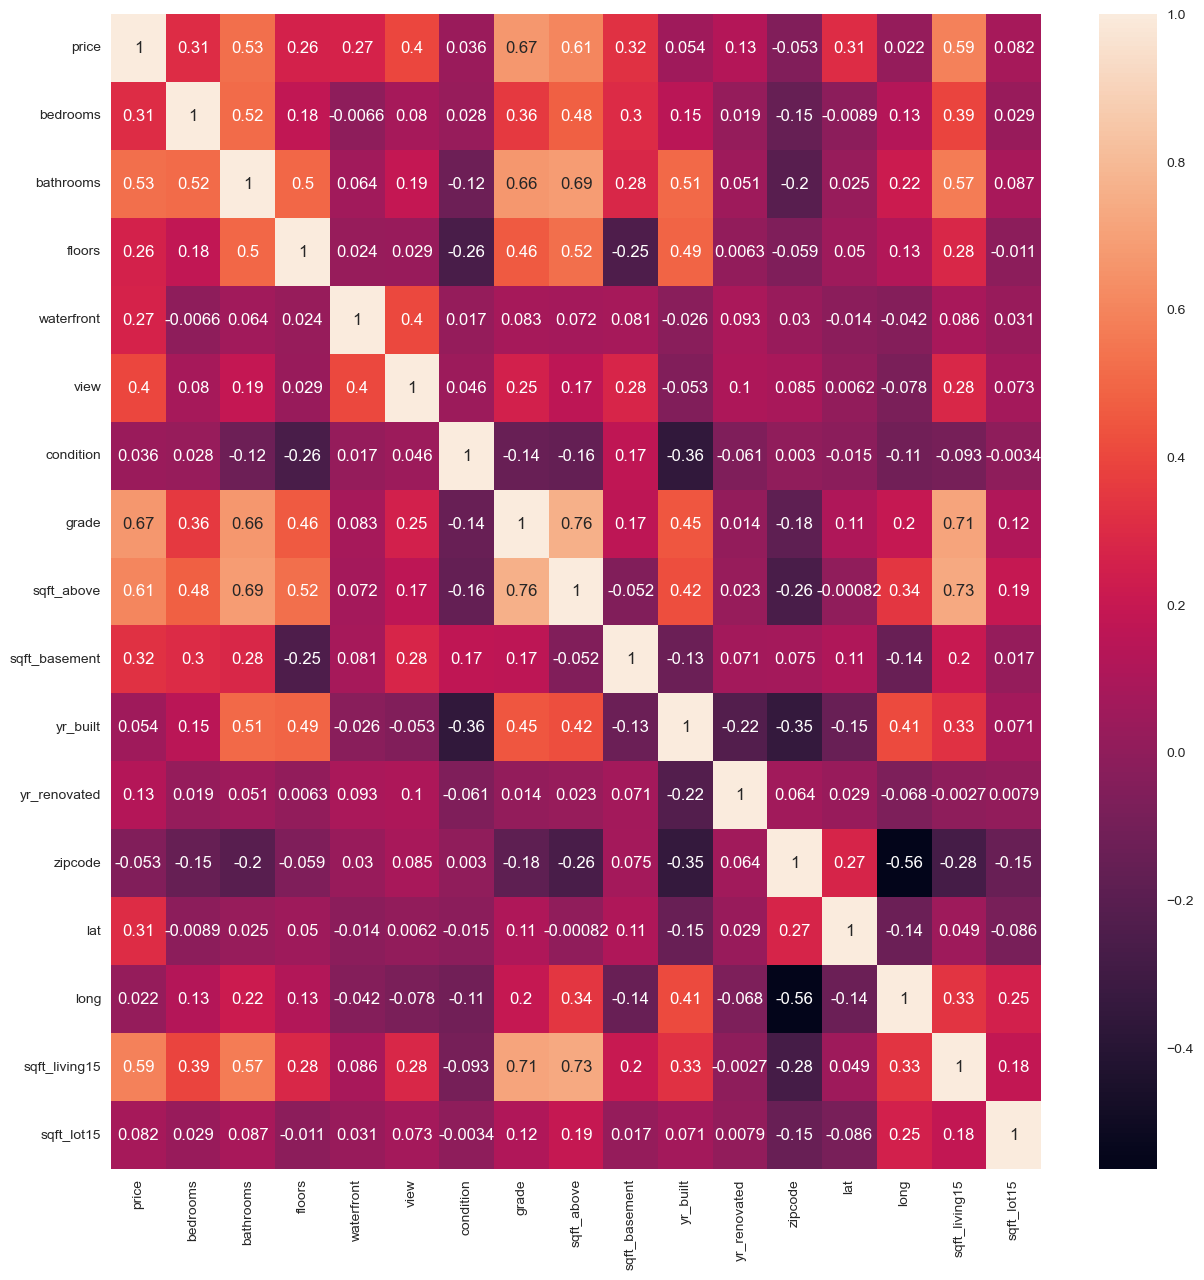

In [122]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(dataset.corr(), annot=True)

### Yellowbricks

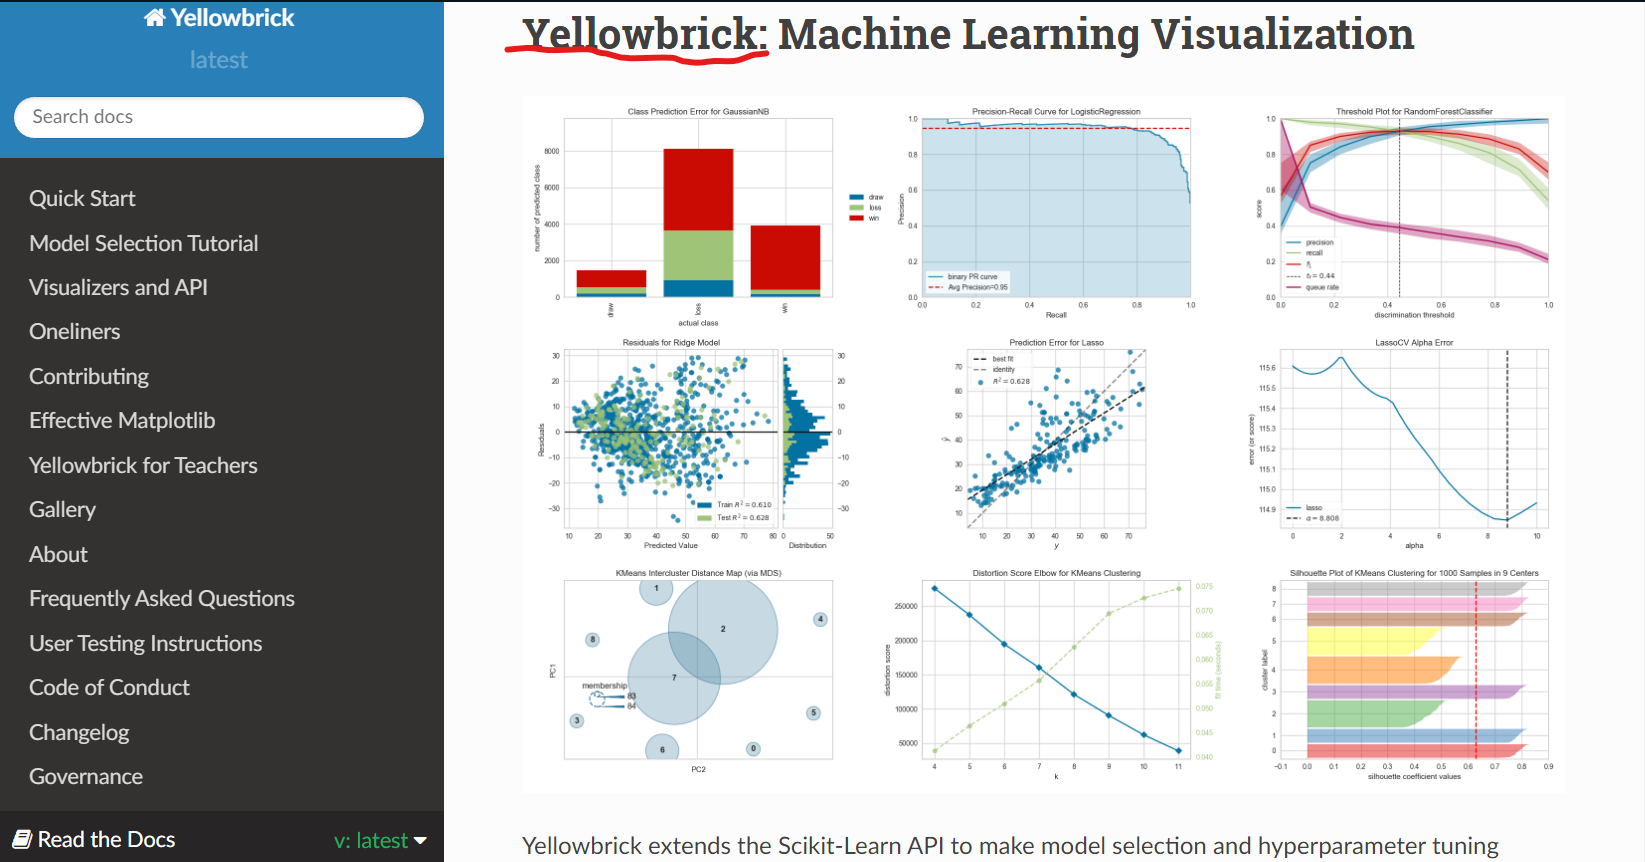

In [123]:
from yellowbrick.target import FeatureCorrelation

In [124]:
!pip install yellowbrick --upgrade

In [125]:
dataset.columns[1:]

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

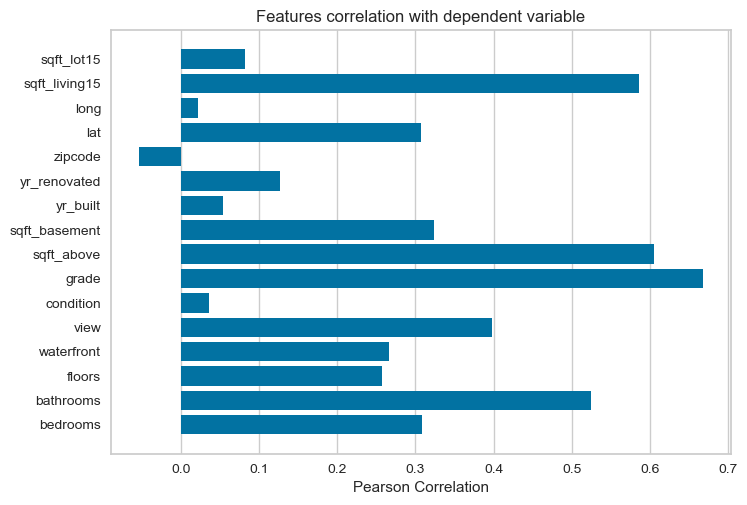

In [126]:
grafico = FeatureCorrelation(labels = dataset.columns[1:])
grafico.fit(dataset.iloc[:, 1:].values, dataset.iloc[:, 0].values) # Cada atributo de X será averiguado com um atributo designado em Y para cálculo de correlação
grafico.show();

In [127]:
dataset # no caso a cima estamos tentando ver a correlação com o preço

price  bedrooms  bathrooms  floors  waterfront  view  condition  \
0      221900.0         3       1.00     1.0           0     0          3   
1      538000.0         3       2.25     2.0           0     0          3   
2      180000.0         2       1.00     1.0           0     0          3   
3      604000.0         4       3.00     1.0           0     0          5   
4      510000.0         3       2.00     1.0           0     0          3   
...         ...       ...        ...     ...         ...   ...        ...   
21608  360000.0         3       2.50     3.0           0     0          3   
21609  400000.0         4       2.50     2.0           0     0          3   
21610  402101.0         2       0.75     2.0           0     0          3   
21611  400000.0         3       2.50     2.0           0     0          3   
21612  325000.0         2       0.75     2.0           0     0          3   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0          7        1180              0      1955             0    98178   
1          7        2170            400      1951          1991    98125   
2          6         770              0      1933             0    98028   
3          7        1050            910      1965             0    98136   
4          8        1680              0      1987             0    98074   
...      ...         ...            ...       ...           ...      ...   
21608      8        1530              0      2009             0    98103   
21609      8        2310              0      2014             0    98146   
21610      7        1020              0      2009             0    98144   
21611      8        1600              0      2004             0    98027   
21612      7        1020              0      2008             0    98144   

           lat     long  sqft_living15  sqft_lot15  
0      47.5112 -122.257           1340        5650  
1      47.7210 -122.319           1690        7639  
2      47.7379 -122.233           2720        8062  
3      47.5208 -122.393           1360        5000  
4      47.6168 -122.045           1800        7503  
...        ...      ...            ...         ...  
21608  47.6993 -122.346           1530        1509  
21609  47.5107 -122.362           1830        7200  
21610  47.5944 -122.299           1020        2007  
21611  47.5345 -122.069           1410        1287  
21612  47.5941 -122.299           1020        1357  

[21613 rows x 17 columns]

## Regressão Linear Simples


A ideial aqui é criar um regressor (calcular um valor numérico), de modo a tentar traçar uma reta que ao jogarmos um valor de X, temos um y de qual seria o valor final.
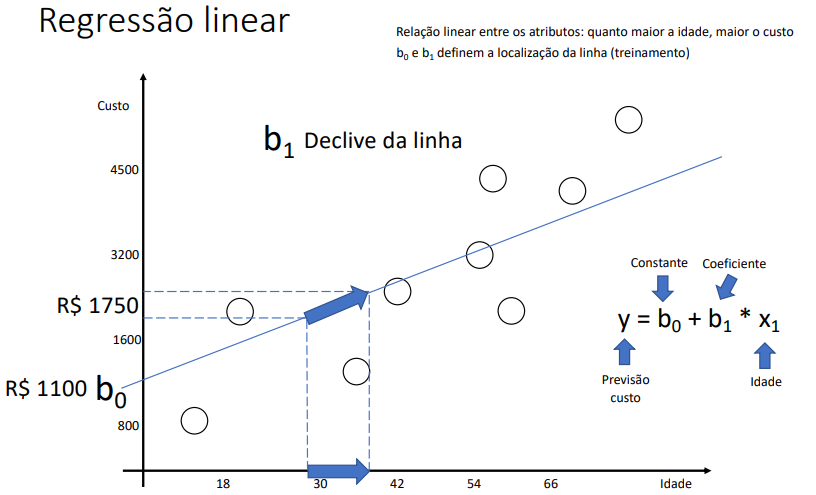

A correção para encontrar os valores de coeficiente da reta e o intercepto de y são com base no algoritmo de descida do gradiente.

O pseudo código abaixo vai mostrar a ideia:

Seja w os pesos da equação, b o parametro de bias, t o estado inicial do treinamento e η (eta) a taxa de aprendizado

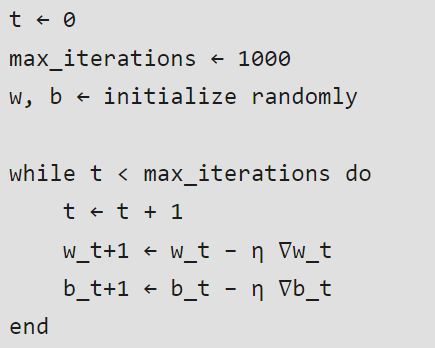

A cada iteração é decidido se o valor de correção de pesos será alto ou baixo de acordo com a distância do erro.

Tomando a equação y= ax +b

a= a - η * gradient(y) ==> derivada da função de custo em relação a m 
b= b - η * gradient(y) ==> derivada da função de custo em relação a b
 
 
 
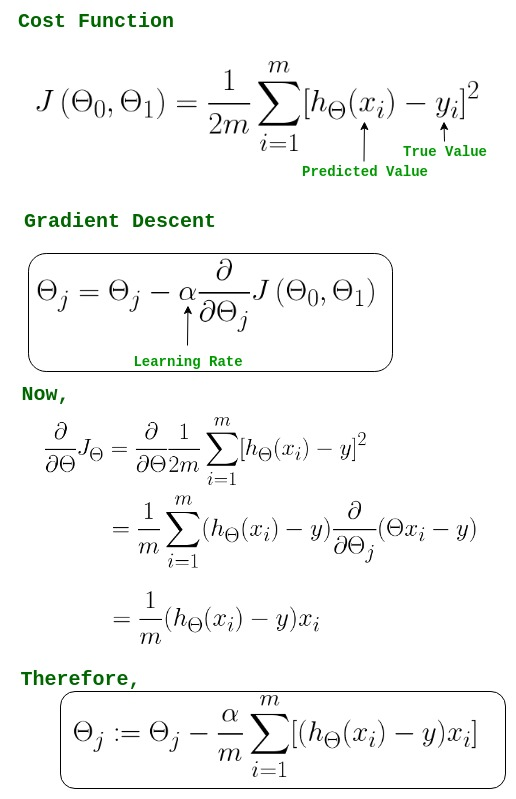!

Lembrando a derivada em mínimos locais/globais tende a 0.

resumindo a história para o calculo do erro:

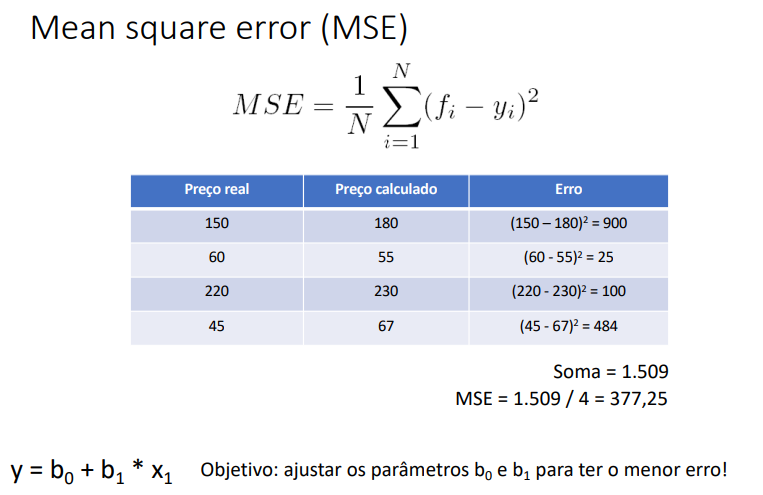

temos as seguintes derivadas : <br>
Derivada do custo em relação ao coeficiente a é igual a derivada do custo em relação ao erro x derivada do erro em relação ao coeficiente (regra da cadeia)

d(custo)/d(variavel a)= d(custo)/ d (erro) x  d (erro)/d (a)


d(custo)/d(variavel a)= 2 x (erro) x d(erro)/d (a) <br> = 2 x (a x (xi) + bi) x  (xi) resultado da derivada

d(cust)/d(variavel b)=  2 x (erro) x d(erro)/d (b) <br> = 2 x (a x (xi) + bi) x 1 (resultado da derivada da função em relação a b)


o mesmo é aplicado para a constante b, mas tratando ax como constante e ficando apenas b, que é 1


Com isso em mãos, temos a primeira iteração de treinamento:

a e b são gerados aleatoriamente, temos o xi do dataset entrando como valor em y=axi+b, com isso calculamos um y para seguir com o ajustes de a e b.






In [128]:
X = dataset['sqft_living15'].values
X.shape

(21613,)

In [129]:
X = X.reshape(-1, 1) #adiciona uma dimensao de coluna 
X.shape

(21613, 1)

In [130]:
y = dataset['price'].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [131]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_treinamento.shape, X_teste.shape

((17290, 1), (4323, 1))

In [132]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [133]:
regressor.intercept_

-65779.26771579555

In [134]:
regressor.coef_

array([304.24389402])

In [135]:
regressor.intercept_ + regressor.coef_ * 900

array([208040.23690391])

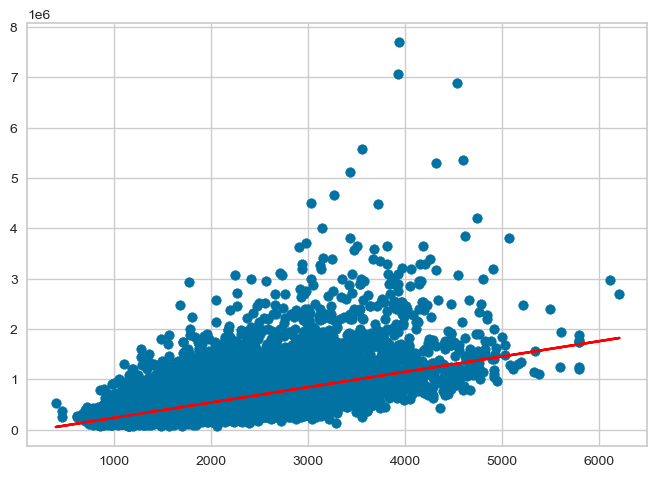

In [136]:
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, regressor.predict(X), color = 'red')

In [137]:
regressor.score(X_treinamento, y_treinamento)

0.3432128000738559

In [138]:
regressor.score(X_teste, y_teste)

0.3394744126244147

## Metricas de Erro

In [139]:
previsoes = regressor.predict(X_teste)

In [140]:
previsoes, y_teste

(array([ 816528.02494771,  427095.84059968, 1108602.16320873, ...,
         494029.4972845 , 1014286.55606194,  487944.61940406]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [141]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [142]:
mean_absolute_error(y_teste, previsoes)

190622.04850436817

In [143]:
mean_squared_error(y_teste, previsoes)

114007357796.49193

In [144]:
math.sqrt(mean_squared_error(y_teste, previsoes))

337649.75610311335

## Regressão Multipla

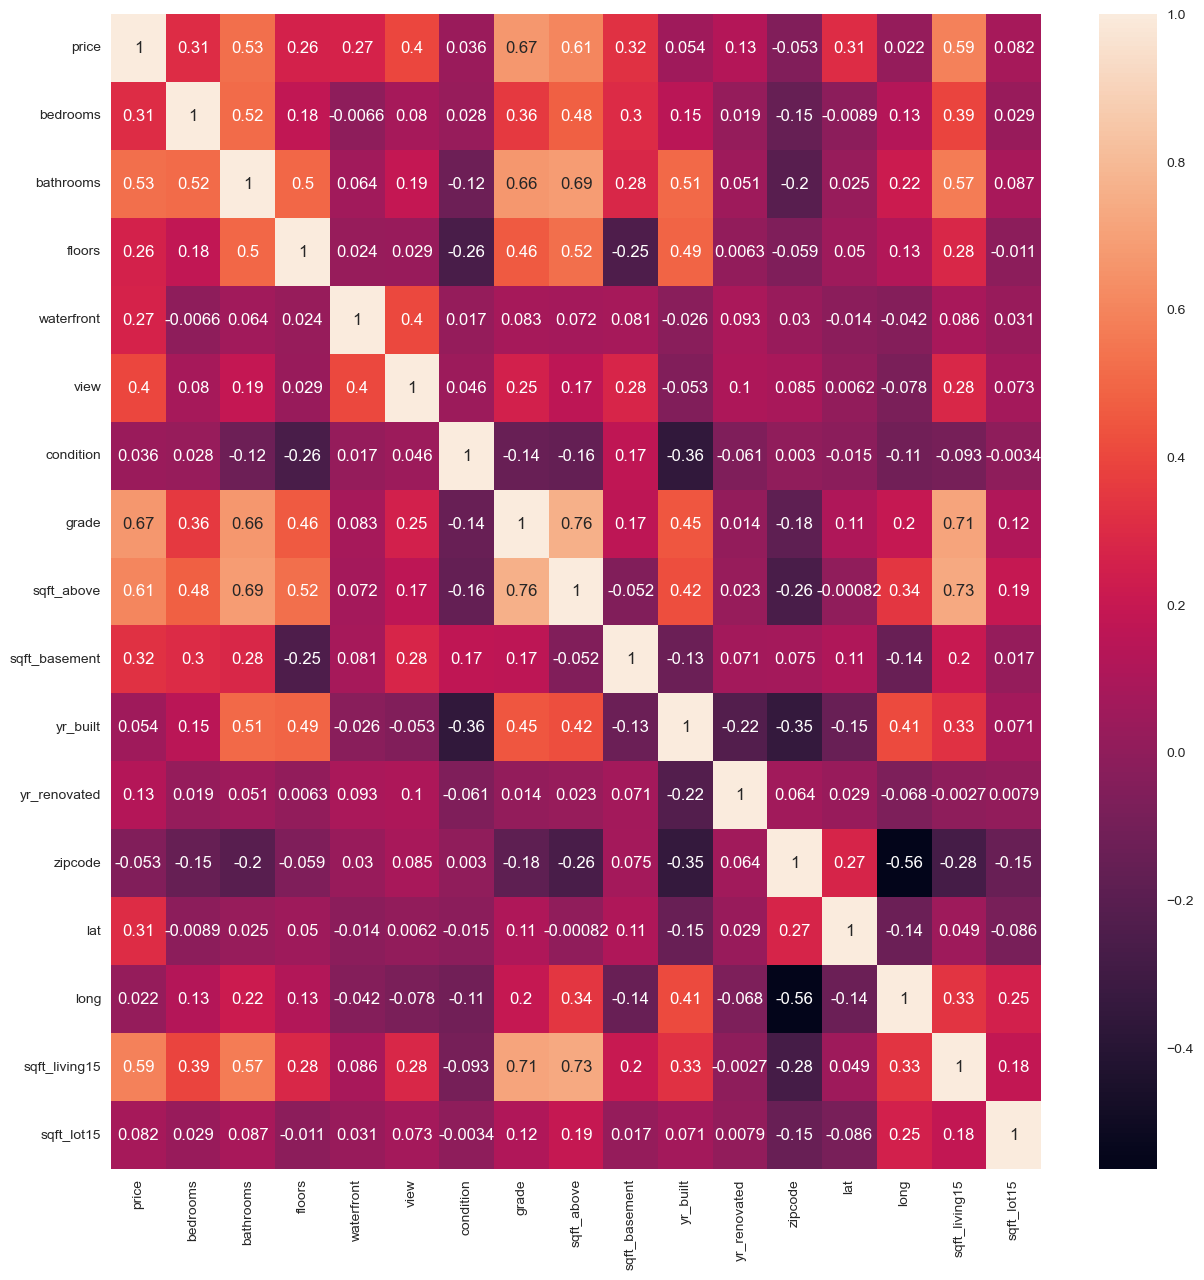

In [145]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(dataset.corr(), annot=True)

In [146]:
dataset.head()

price  bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0  221900.0         3       1.00     1.0           0     0          3      7   
1  538000.0         3       2.25     2.0           0     0          3      7   
2  180000.0         2       1.00     1.0           0     0          3      6   
3  604000.0         4       3.00     1.0           0     0          5      7   
4  510000.0         3       2.00     1.0           0     0          3      8   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        1180              0      1955             0    98178  47.5112   
1        2170            400      1951          1991    98125  47.7210   
2         770              0      1933             0    98028  47.7379   
3        1050            910      1965             0    98136  47.5208   
4        1680              0      1987             0    98074  47.6168   

      long  sqft_living15  sqft_lot15  
0 -122.257           1340        5650  
1 -122.319           1690        7639  
2 -122.233           2720        8062  
3 -122.393           1360        5000  
4 -122.045           1800        7503

In [147]:
X = dataset.iloc[:, [2, 3, 9, 10]].values
X

array([[1.000e+00, 1.000e+00, 0.000e+00, 1.955e+03],
       [2.250e+00, 2.000e+00, 4.000e+02, 1.951e+03],
       [1.000e+00, 1.000e+00, 0.000e+00, 1.933e+03],
       ...,
       [7.500e-01, 2.000e+00, 0.000e+00, 2.009e+03],
       [2.500e+00, 2.000e+00, 0.000e+00, 2.004e+03],
       [7.500e-01, 2.000e+00, 0.000e+00, 2.008e+03]])

In [148]:
y = dataset.iloc[:, 0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

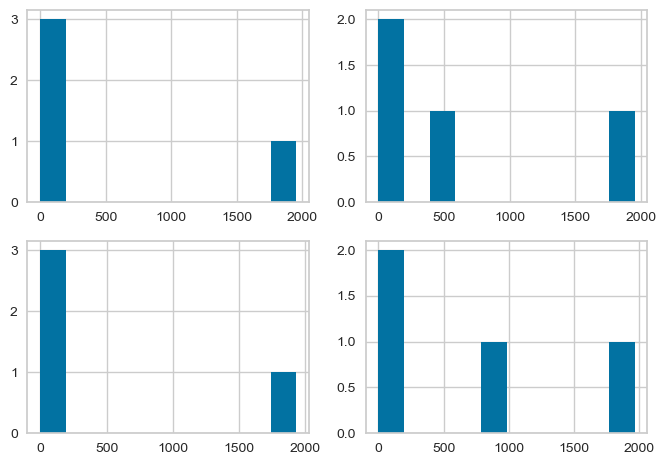

In [149]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(2, 2)
ax[0, 0].hist(X[0])
ax[0, 1].hist(X[1])
ax[1, 0].hist(X[2])
ax[1, 1].hist(X[3]);

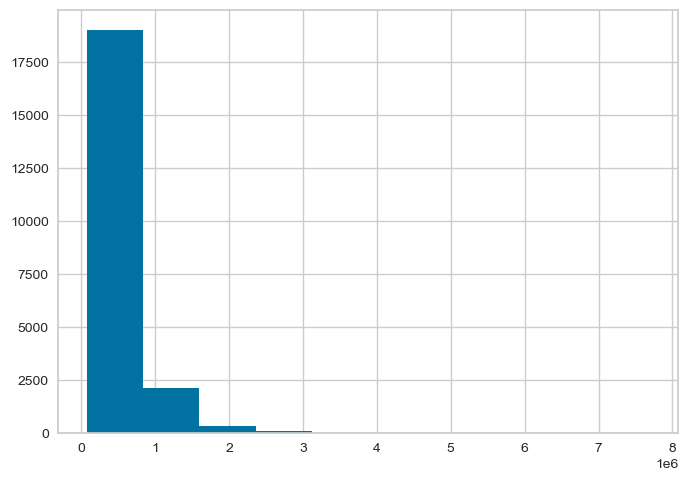

In [150]:
plt.hist(y);

In [151]:
y = np.log(y)

In [152]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_treinamento.shape, X_teste.shape

((17290, 4), (4323, 4))

In [153]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [154]:
regressor.score(X_treinamento, y_treinamento)

0.39251171573180055

In [155]:
regressor.score(X_teste, y_teste)

0.40499793112079285

In [156]:
previsoes = regressor.predict(X_teste)
mean_absolute_error(y_teste, previsoes)

0.33079826724270267

### Usando mais atributos

In [157]:
dataset.drop(labels = ['sqft_living15', 'sqft_lot15'], axis = 1, inplace=True)
dataset.head()

price  bedrooms  bathrooms  floors  waterfront  view  condition  grade  \
0  221900.0         3       1.00     1.0           0     0          3      7   
1  538000.0         3       2.25     2.0           0     0          3      7   
2  180000.0         2       1.00     1.0           0     0          3      6   
3  604000.0         4       3.00     1.0           0     0          5      7   
4  510000.0         3       2.00     1.0           0     0          3      8   

   sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0        1180              0      1955             0    98178  47.5112   
1        2170            400      1951          1991    98125  47.7210   
2         770              0      1933             0    98028  47.7379   
3        1050            910      1965             0    98136  47.5208   
4        1680              0      1987             0    98074  47.6168   

      long  
0 -122.257  
1 -122.319  
2 -122.233  
3 -122.393  
4 -122.045

In [158]:
X = dataset.iloc[:, 1:17].values
y = dataset.iloc[:, 0].values

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 1)
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [160]:
regressor.score(X_treinamento, y_treinamento)

0.702834382022565

In [161]:
regressor.score(X_teste, y_teste)

0.6849149549924545

### Selecao de atributos


A base de dados precos das casas possuem vários atributos que podem ser utilizados. A seleção de atributos é baseado em f_regression, chi2 (teste quiquadrado)

In [162]:
dataset

price  bedrooms  bathrooms  floors  waterfront  view  condition  \
0      221900.0         3       1.00     1.0           0     0          3   
1      538000.0         3       2.25     2.0           0     0          3   
2      180000.0         2       1.00     1.0           0     0          3   
3      604000.0         4       3.00     1.0           0     0          5   
4      510000.0         3       2.00     1.0           0     0          3   
...         ...       ...        ...     ...         ...   ...        ...   
21608  360000.0         3       2.50     3.0           0     0          3   
21609  400000.0         4       2.50     2.0           0     0          3   
21610  402101.0         2       0.75     2.0           0     0          3   
21611  400000.0         3       2.50     2.0           0     0          3   
21612  325000.0         2       0.75     2.0           0     0          3   

       grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode  \
0          7        1180              0      1955             0    98178   
1          7        2170            400      1951          1991    98125   
2          6         770              0      1933             0    98028   
3          7        1050            910      1965             0    98136   
4          8        1680              0      1987             0    98074   
...      ...         ...            ...       ...           ...      ...   
21608      8        1530              0      2009             0    98103   
21609      8        2310              0      2014             0    98146   
21610      7        1020              0      2009             0    98144   
21611      8        1600              0      2004             0    98027   
21612      7        1020              0      2008             0    98144   

           lat     long  
0      47.5112 -122.257  
1      47.7210 -122.319  
2      47.7379 -122.233  
3      47.5208 -122.393  
4      47.6168 -122.045  
...        ...      ...  
21608  47.6993 -122.346  
21609  47.5107 -122.362  
21610  47.5944 -122.299  
21611  47.5345 -122.069  
21612  47.5941 -122.299  

[21613 rows x 15 columns]

In [163]:
from sklearn.feature_selection import SelectFdr, f_regression
selecao = SelectFdr(f_regression, alpha = 0.0)
X_novo = selecao.fit_transform(X, y)
X.shape, X_novo.shape

((21613, 14), (21613, 8))

In [164]:
selecao.pvalues_

array([0.00000000e+000, 0.00000000e+000, 1.58101007e-322, 0.00000000e+000,
       0.00000000e+000, 8.93565406e-008, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 1.92987281e-015, 1.02134789e-077, 5.01105043e-015,
       0.00000000e+000, 1.47509222e-003])

In [171]:
colunas = selecao.get_support()
colunas

array([ True,  True, False,  True,  True, False,  True,  True,  True,
       False, False, False,  True, False])

In [172]:
dataset.columns[1:17]

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long'],
      dtype='object')

In [167]:
dataset.columns[1:17][colunas == True]

Index(['bedrooms', 'bathrooms', 'waterfront', 'view', 'grade', 'sqft_above',
       'sqft_basement', 'lat'],
      dtype='object')

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_novo, y, test_size = 0.2, random_state = 1)
regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [169]:
regressor.score(X_treinamento, y_treinamento)

0.6600844333469127

In [170]:
regressor.score(X_teste, y_teste)

0.6443733684297973

## Regressão Polinomial 


A ideia é ao invés de traçar uma reta que melhor representa nosso conjunto de dados, será feita uma curva.

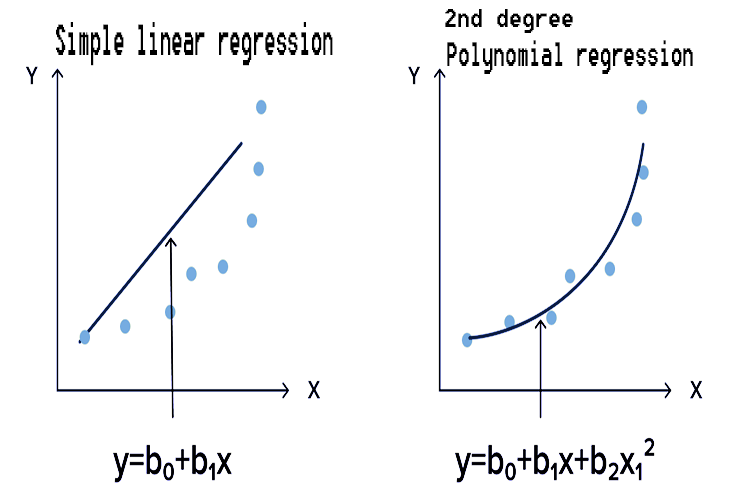


para cada característica xi, temos que aplicar ao grao do polinômio escolhido

### Base plano de saúde

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import plotly.express as px

In [3]:
df_plano_saude=pd.read_csv('data_base/plano_saude2.csv')
df_plano_saude.head()

idade  custo
0     18    470
1     23    520
2     28    630
3     33    830
4     38   1150

In [4]:
x_plano_saude = df_plano_saude.iloc[:, 0:1].values
y_plano_saude = df_plano_saude.iloc[:, 1:2].values

In [5]:
display(x_plano_saude)
display(y_plano_saude)

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

array([[  470],
       [  520],
       [  630],
       [  830],
       [ 1150],
       [ 1530],
       [ 2040],
       [ 3080],
       [ 5100],
       [10100]], dtype=int64)

In [6]:
x_plano_saude.shape, y_plano_saude.shape

((10, 1), (10, 1))

In [7]:
y_plano_saude = y_plano_saude.reshape(-1, 1) #adiciona uma dimensao de coluna
display(y_plano_saude.shape)
display(y_plano_saude)  

(10, 1)

array([[  470],
       [  520],
       [  630],
       [  830],
       [ 1150],
       [ 1530],
       [ 2040],
       [ 3080],
       [ 5100],
       [10100]], dtype=int64)

In [8]:

poly= PolynomialFeatures(degree=4) # grau do polinomio
x_poly=poly.fit_transform(x_plano_saude) # transforma os dados em polinomio
display(x_poly.shape) # mostra o tamanho do polinomio
display(x_poly) # mostra o polinomio

(10, 5)

array([[1.0000000e+00, 1.8000000e+01, 3.2400000e+02, 5.8320000e+03,
        1.0497600e+05],
       [1.0000000e+00, 2.3000000e+01, 5.2900000e+02, 1.2167000e+04,
        2.7984100e+05],
       [1.0000000e+00, 2.8000000e+01, 7.8400000e+02, 2.1952000e+04,
        6.1465600e+05],
       [1.0000000e+00, 3.3000000e+01, 1.0890000e+03, 3.5937000e+04,
        1.1859210e+06],
       [1.0000000e+00, 3.8000000e+01, 1.4440000e+03, 5.4872000e+04,
        2.0851360e+06],
       [1.0000000e+00, 4.3000000e+01, 1.8490000e+03, 7.9507000e+04,
        3.4188010e+06],
       [1.0000000e+00, 4.8000000e+01, 2.3040000e+03, 1.1059200e+05,
        5.3084160e+06],
       [1.0000000e+00, 5.3000000e+01, 2.8090000e+03, 1.4887700e+05,
        7.8904810e+06],
       [1.0000000e+00, 5.8000000e+01, 3.3640000e+03, 1.9511200e+05,
        1.1316496e+07],
       [1.0000000e+00, 6.3000000e+01, 3.9690000e+03, 2.5004700e+05,
        1.5752961e+07]])

In [9]:
display(x_plano_saude[0])
display(x_poly[0]) # mostra o polinomio do primeiro dado
# o polinomio do primeiro dado é [1, 1, 1,1,1] ou seja, 1*x^0 + 1*x^1 + 1*x^2 +
# Logo o x é substituido por 18 e aplicado a cada um desses valores.


array([18], dtype=int64)

array([1.00000e+00, 1.80000e+01, 3.24000e+02, 5.83200e+03, 1.04976e+05])

In [10]:
regressor_polinomial = LinearRegression() # cria o modelo de regressao 
regressor_polinomial.fit(x_poly, y_plano_saude) # faz o ajuste do modelo com os dados de treino

LinearRegression()

A baixo temos b0*x1 + b1*x1 + b2*x1 + b3*x1 + b4*x1
o intercepto é b0 e os demais coeficientes o b1..bn

In [11]:
display(regressor_polinomial.intercept_) # mostra o valor do intercepto b0
display(regressor_polinomial.coef_) # mostra os coeficientes b1, b2, b3, ... , bn

array([16561.97465354])

array([[ 0.00000000e+00, -2.12242253e+03,  9.90404200e+01,
        -1.95058276e+00,  1.40792541e-02]])

In [12]:
novo=[[40]] # novo dado para prever o valor do plano de saude, simulando uma idade
novo=poly.transform(novo) # transforma o novo dado em polinomio
display(novo) # mostra o polinomio do novo dado
display(novo.shape) # mostra o tamanho do polinomio do novo dado

array([[1.00e+00, 4.00e+01, 1.60e+03, 6.40e+04, 2.56e+06]])

(1, 5)

array([[1335.33958151]])

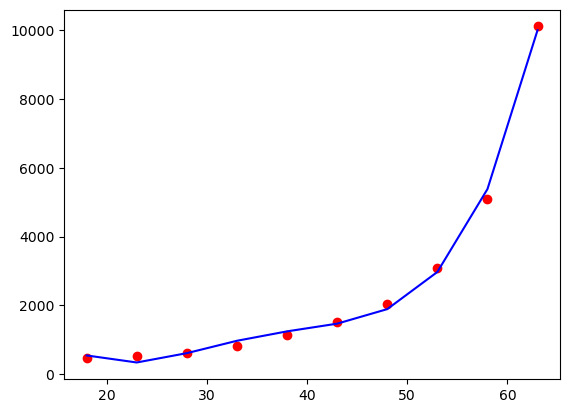

In [13]:
display(regressor_polinomial.predict(novo)) # faz a previsao do novo dado
import matplotlib.pyplot as plt
plt.scatter(x_plano_saude, y_plano_saude, color='red') # plota os dados de treino
plt.plot(x_plano_saude, regressor_polinomial.predict(poly.fit_transform(x_plano_saude)), color='blue') # plota a linha de regressao

array([[ 549.65035684],
       [ 345.85081742],
       [ 616.53846152],
       [ 975.83916114],
       [1249.06760004],
       [1472.72727373],
       [1894.5104895 ],
       [2973.29836636],
       [5379.16083513],
       [9993.35663833]])

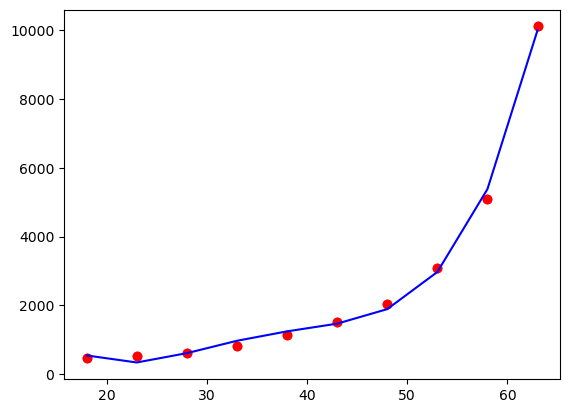

In [14]:
previsoes= regressor_polinomial.predict(x_poly) # faz a previsao dos dados de treino
display(previsoes) # mostra as previsoes dos dados de treino
plt.scatter(x_plano_saude, y_plano_saude, color='red') # plota os dados de treino
plt.plot(x_plano_saude, previsoes, color='blue') # plota a linha de regressao
plt.scatter(x_plano_saude, y_plano_saude, color='red') # plota os dados de treino

In [15]:
x_plano_saude.shape, y_plano_saude.shape # mostra o tamanho dos dados de treino

((10, 1), (10, 1))

In [16]:
x_plano_saude[:,0].ravel().shape # ravel transforma o array em uma linha

(10,)

ravel serve para transformar a matriz [10,1] e um vetor

In [17]:
grafico=px.scatter(x=x_plano_saude[:,0].ravel(), y=y_plano_saude.ravel() ) # plota os dados de treino em 3D
grafico.add_scatter(x=x_plano_saude[:,0].ravel(), y=previsoes.ravel(), mode='lines', name='Previsao') # plota a linha de regressao em 3D
grafico.show() # mostra o grafico em 3D

### Base preço de casas

In [18]:
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('data_base/house_prices.csv')
dataset.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [19]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [20]:
X= dataset.iloc[:, [3,4,5,6,7,9,10,11,12,13,14,15]].values # seleciona as colunas que serao usadas como variaveis independentes
display(X)
y=dataset.iloc[:,2].values # seleciona a coluna que sera usada como variavel dependente
display(y)

array([[3.000e+00, 1.000e+00, 1.180e+03, ..., 0.000e+00, 1.955e+03,
        0.000e+00],
       [3.000e+00, 2.250e+00, 2.570e+03, ..., 4.000e+02, 1.951e+03,
        1.991e+03],
       [2.000e+00, 1.000e+00, 7.700e+02, ..., 0.000e+00, 1.933e+03,
        0.000e+00],
       ...,
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 2.009e+03,
        0.000e+00],
       [3.000e+00, 2.500e+00, 1.600e+03, ..., 0.000e+00, 2.004e+03,
        0.000e+00],
       [2.000e+00, 7.500e-01, 1.020e+03, ..., 0.000e+00, 2.008e+03,
        0.000e+00]])

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [21]:
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [22]:
from sklearn.feature_selection import SelectFdr, f_regression
selecao = SelectFdr(f_regression, alpha = 0.0)
X_novo = selecao.fit_transform(X_casas_treinamento, y_casas_treinamento)
X.shape, X_novo.shape

((21613, 12), (15129, 7))

In [23]:
colunas = selecao.get_support()
display(colunas)
X_novo=X_novo[:,:] # seleciona as colunas que foram escolhidas pelo algoritmo de selecao de atributos
X_novo.shape # mostra o tamanho dos dados de treino

array([ True,  True,  True, False, False,  True, False,  True,  True,
        True, False, False])

(15129, 7)

In [24]:
poly= PolynomialFeatures(degree=4) # grau do polinomio
x_poly2=poly.fit_transform(X_novo) # transforma os dados em polinomio
display(x_poly2.shape) # mostra o tamanho do polinomio
display(x_poly2) # mostra o polinomio

(15129, 330)

array([[1.00000000e+00, 4.00000000e+00, 1.50000000e+00, ...,
        8.12250000e+10, 1.78125000e+10, 3.90625000e+09],
       [1.00000000e+00, 3.00000000e+00, 1.50000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 5.00000000e+00, 2.75000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 3.00000000e+00, 2.25000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 2.25000000e+00, ...,
        1.67340096e+12, 9.12764160e+11, 4.97871360e+11]])

In [25]:
x_poly2_teste=poly.fit_transform(X_casas_teste[:,colunas]) # transforma os dados de teste em polinomio
display(x_poly2_teste.shape) # mostra o tamanho do polinomio de teste

(6484, 330)

<h4> Explicacao numero de termos resultantes </h4>
Explicação do real motivo de 7 atributos virarem 36:<br>

Em tese temos 7 atributos, logo 7 atributos irão ter o valor da constante (intercepto) <br>

para grau 1: temos 7 atributos para grau 1


para grau 2: temos 7 atributos para grau 2


logo daria 21, porém não é assim que é considerado, pois acontece uma interação: <br>

Termos de Interação: O produto de cada par distinto de atributos originais.<br>
Atributos: x₁x₂, x₁x₃, ..., x₁x₇ (6 termos) <br>
x₂x₃, x₂x₄, ..., x₂x₇ (5 termos)<br>
x₃x₄, ..., x₃x₇ (4 termos)<br>
x₄x₅, x₄x₆, x₄x₇ (3 termos)<br>
x₅x₆, x₅x₇ (2 termos)<br>
x₆x₇ (1 termo)<br>
Número total de termos de interação: 6 + 5 + 4 + 3 + 2 + 1 = 21 termos.<br>
Alternativamente, isso é o número de combinações de 7 atributos tomados 2 a 2: C(7, 2) = 7! / (2! * (7-2)!) = (7 * 6) / 2 = 21.


In [26]:
x_poly2[0] 

array([1.00000000e+00, 4.00000000e+00, 1.50000000e+00, 1.39000000e+03,
       0.00000000e+00, 7.00000000e+00, 1.14000000e+03, 2.50000000e+02,
       1.60000000e+01, 6.00000000e+00, 5.56000000e+03, 0.00000000e+00,
       2.80000000e+01, 4.56000000e+03, 1.00000000e+03, 2.25000000e+00,
       2.08500000e+03, 0.00000000e+00, 1.05000000e+01, 1.71000000e+03,
       3.75000000e+02, 1.93210000e+06, 0.00000000e+00, 9.73000000e+03,
       1.58460000e+06, 3.47500000e+05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.90000000e+01, 7.98000000e+03,
       1.75000000e+03, 1.29960000e+06, 2.85000000e+05, 6.25000000e+04,
       6.40000000e+01, 2.40000000e+01, 2.22400000e+04, 0.00000000e+00,
       1.12000000e+02, 1.82400000e+04, 4.00000000e+03, 9.00000000e+00,
       8.34000000e+03, 0.00000000e+00, 4.20000000e+01, 6.84000000e+03,
       1.50000000e+03, 7.72840000e+06, 0.00000000e+00, 3.89200000e+04,
       6.33840000e+06, 1.39000000e+06, 0.00000000e+00, 0.00000000e+00,
      

In [27]:
regressor_polinomial = LinearRegression() # cria o modelo de regressao 
regressor_polinomial.fit(x_poly2, y_casas_treinamento) # faz o ajuste do modelo com os dados de treino

LinearRegression()

In [28]:
display(regressor_polinomial.score(x_poly2, y_casas_treinamento)) # mostra o score do modelo de regressao polinomial dados de treinamento
display(regressor_polinomial.score(x_poly2_teste, y_casas_teste)) # mostra o score do modelo de regressao polinomial dados de teste

0.6556043112452767

0.5075796064285562

## Regressão E Classificação por Árvore de Decisão


A regressão na árvore de decisão consiste em realizar split (cria um ponto de ramificação da árvore) que separada atributos em R^n , com x1 e x2 sendo atributos e y o resultado: <br>

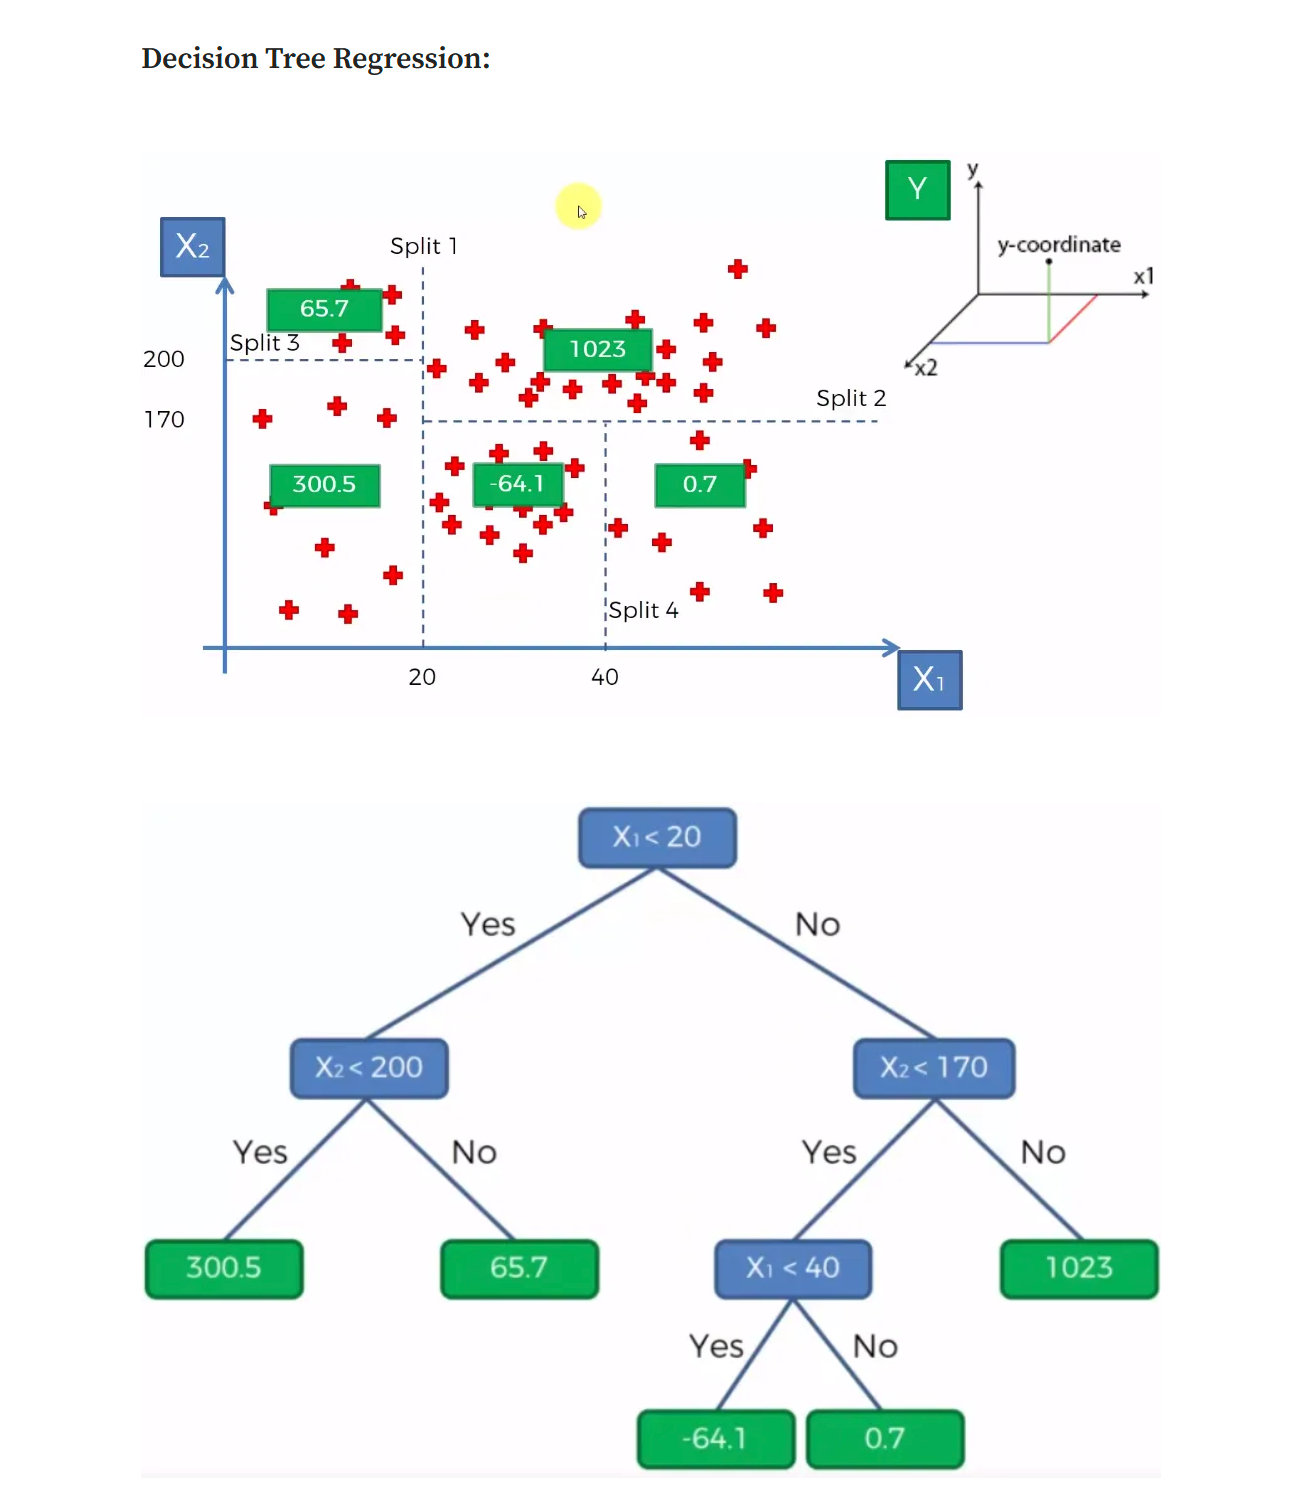 <br>

O valor do regressor é a média dos  valores na região <br>

A Classificação por árvore de decisão faz a mesma coisa, mas cria uma área de classificação, conforme a figura abaixo <br>

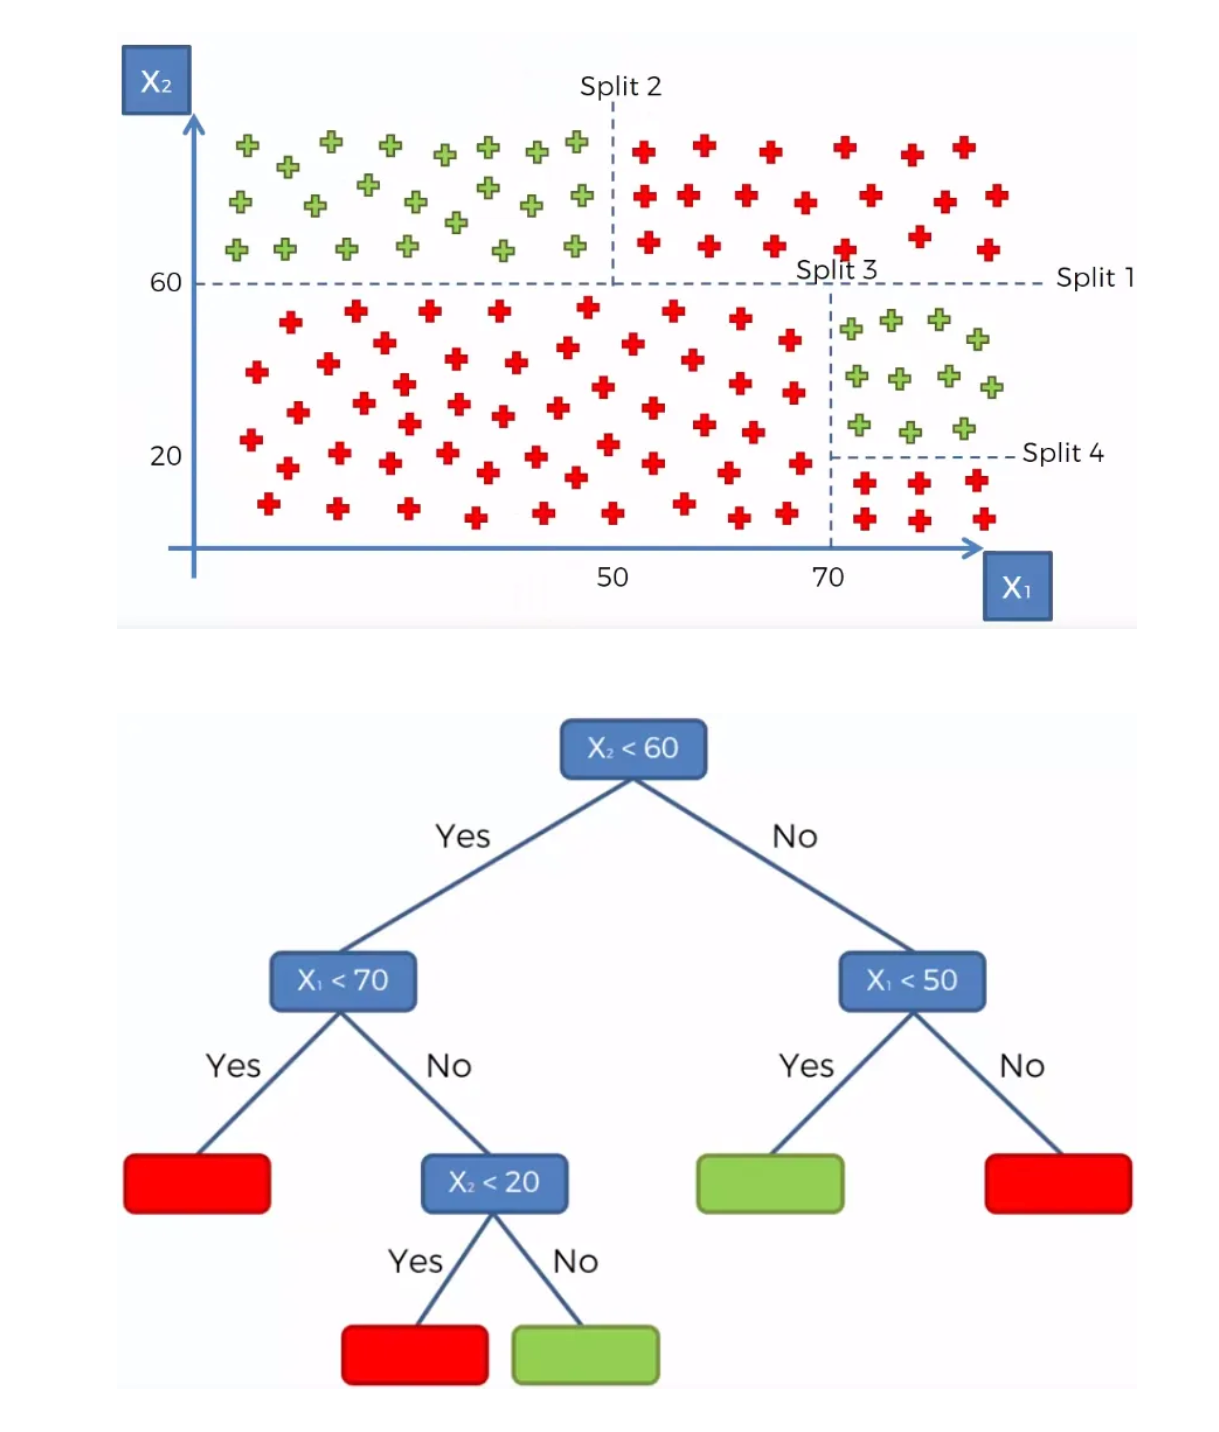


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import plotly.express as px
import numpy as np

### base plano de saude2

In [3]:
df_plano_saude=pd.read_csv('data_base/plano_saude2.csv')
df_plano_saude.head()

idade  custo
0     18    470
1     23    520
2     28    630
3     33    830
4     38   1150

In [4]:
x_plano_saude = df_plano_saude.iloc[:, 0:1].values
y_plano_saude = df_plano_saude.iloc[:, 1:2].values

In [5]:
display(x_plano_saude)
display(y_plano_saude)

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

array([[  470],
       [  520],
       [  630],
       [  830],
       [ 1150],
       [ 1530],
       [ 2040],
       [ 3080],
       [ 5100],
       [10100]], dtype=int64)

In [6]:
x_plano_saude.shape, y_plano_saude.shape

((10, 1), (10, 1))

In [7]:
y_plano_saude = y_plano_saude.reshape(-1, 1) #adiciona uma dimensao de coluna
display(y_plano_saude.shape)
display(y_plano_saude)  

(10, 1)

array([[  470],
       [  520],
       [  630],
       [  830],
       [ 1150],
       [ 1530],
       [ 2040],
       [ 3080],
       [ 5100],
       [10100]], dtype=int64)

In [8]:
regressor_arvore_saude = DecisionTreeRegressor(random_state=0) # cria o modelo de arvore de decisao
regressor_arvore_saude.fit(x_plano_saude, y_plano_saude) # faz o ajuste do modelo com os dados de treino

DecisionTreeRegressor(random_state=0)

In [9]:
regressor_arvore_saude.get_params() # mostra os parametros do modelo de arvore de decisao

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [10]:
previsoes=regressor_arvore_saude.predict(x_plano_saude) # faz a previsao dos dados de treino
display(previsoes) # mostra as previsoes dos dados de treino
display(regressor_arvore_saude.score(x_plano_saude, y_plano_saude)) # mostra o score do modelo de arvore de decisao dados de treino


array([  470.,   520.,   630.,   830.,  1150.,  1530.,  2040.,  3080.,
        5100., 10100.])

1.0

In [11]:
grafico=px.scatter(x=x_plano_saude[:,0].ravel(), y=y_plano_saude.ravel() ) # plota os dados de treino em 3D
grafico.add_scatter(x=x_plano_saude[:,0].ravel(), y=previsoes.ravel(), mode='lines', name='Previsao') # plota a linha de regressao em 3D 
grafico.show() # mostra o grafico em 3D

In [12]:
X_teste_arvore=np.arange(min(x_plano_saude), max(x_plano_saude), 0.1) # cria um array com os valores de x entre o minimo e o maximo dos dados de treino
X_teste_arvore=X_teste_arvore.reshape(-1, 1) # transforma os dados de teste em uma coluna
display(X_teste_arvore.shape) # mostra o tamanho dos dados de teste
display(X_teste_arvore) # mostra os dados de teste

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_39380\2896624324.py:1: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



(450, 1)

array([[18. ],
       [18.1],
       [18.2],
       [18.3],
       [18.4],
       [18.5],
       [18.6],
       [18.7],
       [18.8],
       [18.9],
       [19. ],
       [19.1],
       [19.2],
       [19.3],
       [19.4],
       [19.5],
       [19.6],
       [19.7],
       [19.8],
       [19.9],
       [20. ],
       [20.1],
       [20.2],
       [20.3],
       [20.4],
       [20.5],
       [20.6],
       [20.7],
       [20.8],
       [20.9],
       [21. ],
       [21.1],
       [21.2],
       [21.3],
       [21.4],
       [21.5],
       [21.6],
       [21.7],
       [21.8],
       [21.9],
       [22. ],
       [22.1],
       [22.2],
       [22.3],
       [22.4],
       [22.5],
       [22.6],
       [22.7],
       [22.8],
       [22.9],
       [23. ],
       [23.1],
       [23.2],
       [23.3],
       [23.4],
       [23.5],
       [23.6],
       [23.7],
       [23.8],
       [23.9],
       [24. ],
       [24.1],
       [24.2],
       [24.3],
       [24.4],
       [24.5],
       [24

In [13]:
previsoes_arvore=regressor_arvore_saude.predict(X_teste_arvore) # faz a previsao dos dados de teste
#display(previsoes_arvore) # mostra as previsoes dos dados de teste
display(regressor_arvore_saude.score(X_teste_arvore, previsoes_arvore)) # mostra o score do modelo de arvore de decisao dados de teste
grafico=px.scatter(x=x_plano_saude[:,0].ravel(), y=y_plano_saude.ravel() ) # plota os dados de treino em 3D
grafico.add_scatter(x=X_teste_arvore[:,0].ravel(), y=previsoes_arvore.ravel(), mode='lines', name='Previsao') # plota a linha de regressao em 3D
grafico.show() # mostra o grafico em 3D

1.0

Perceba que ao selecionar ao passar o ponteiro do mouse dentro da 'plataforma da escada' teremos um intervalo, ou seja, valores dentro de um range de X serão colocados dentro de uma mesmo valor de y: <br>

45.6-50.5 em X serão atribuidos 2040

In [14]:
display(regressor_arvore_saude.predict([[40]])) # faz a previsao para o novo dado de idade 40
display(regressor_arvore_saude.predict([[18]])) # faz a previsao para o novo dado de idade 18

array([1150.])

array([470.])

### base preço das casas

In [15]:
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('data_base/house_prices.csv')
dataset.head()


id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [16]:
X= dataset.iloc[:, [3,4,5,6,7,9,10,11,12,13,14,15,16,17,18]].values # seleciona as colunas que serao usadas como variaveis independentes
display(X)
y=dataset.iloc[:,2].values # seleciona a coluna que sera usada como variavel dependente
display(y)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [17]:
X_casas_treinamento, X_casas_teste, y_casas_treinamento, y_casas_teste = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [18]:
regressor_casas_arvore = DecisionTreeRegressor(random_state=0) # cria o modelo de arvore de decisao
regressor_casas_arvore.fit(X_casas_treinamento, y_casas_treinamento) # faz o ajuste do modelo com os dados de treino

DecisionTreeRegressor(random_state=0)

In [19]:
display(regressor_casas_arvore.get_params()) # mostra os parametros do modelo de arvore de decisao
display(regressor_casas_arvore.score(X_casas_treinamento, y_casas_treinamento)) # mostra o score do modelo de arvore de decisao dados de treino
display(regressor_casas_arvore.score(X_casas_teste, y_casas_teste)) # mostra o score do modelo de arvore de decisao dados de teste

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

0.9992712177726063

0.7556056066131378

In [20]:
previsoes_casas=regressor_casas_arvore.predict(X_casas_teste) # faz a previsao dos dados de teste
display(previsoes_casas) # mostra as previsoes dos dados de teste
grafico=px.scatter(x=X_casas_teste[:,0].ravel(), y=y_casas_teste.ravel() ) # plota os dados de teste em 3D
grafico.add_scatter(x=X_casas_teste[:,0].ravel(), y=previsoes_casas.ravel(), mode='lines', name='Previsao') # plota a linha de regressao em 3D
grafico.show() # mostra o grafico em 3D

array([ 288000., 1980000.,  480000., ...,  289000.,  245000.,  205000.])

o significado abaixo é que ao tentar prever o valor de uma casa eu posso errar 99089 para cima ou para baixo em média.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
display(mean_absolute_error(y_casas_teste, previsoes_casas)) # calcula o erro medio absoluto
display(mean_squared_error(y_casas_teste, previsoes_casas)) # calcula o erro medio quadratico

99089.98604256632

33553383237.15943

### Random Forest


Várias árvores são geradas e para classificação utiliza o voto da maioria, enquanto regressão utiliza a média.


#### Plano de Saude

In [22]:
from sklearn.ensemble import RandomForestRegressor
regressos_saude = RandomForestRegressor(n_estimators=10, random_state=0) # cria o modelo de floresta aleatoria
regressos_saude.fit(x_plano_saude, y_plano_saude) # faz o ajuste do modelo com os dados de treino
display(regressos_saude.get_params()) # mostra os parametros do modelo de floresta aleatoria
display(regressos_saude.score(x_plano_saude, y_plano_saude)) # mostra o score do modelo de floresta aleatoria dados de treino

C:\Users\WILLIAM\AppData\Local\Temp\ipykernel_39380\3328085479.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

0.970907451765773

Aqui eu usei a base ali de cima, que foi alterada para verificar a aplicação na base de plano de saúde e visualizar os splits.

In [23]:
grafico=px.scatter(x=x_plano_saude[:,0].ravel(), y=y_plano_saude.ravel() ) # plota os dados de treino em 3D
grafico.add_scatter(x=X_teste_arvore[:,0].ravel(), y=regressos_saude.predict(X_teste_arvore).ravel(), mode='lines', name='Previsao') # plota a linha de regressao em 3D
grafico.show() # mostra o grafico em 3D

In [24]:
display(regressos_saude.predict([[40]])) # faz a previsao para o novo dado de idade 40
display(regressos_saude.predict([[18]])) # faz a previsao para o novo dado de idade 18

array([1124.])

array([480.])

#### Base preco casa

In [25]:
regressor_random_forest_casa=RandomForestRegressor(n_estimators=125, random_state=0) # cria o modelo de floresta aleatoria
regressor_random_forest_casa.fit(X_casas_treinamento, y_casas_treinamento) # faz o ajuste do modelo com os dados de treino
display(regressor_random_forest_casa.get_params()) # mostra os parametros do modelo de floresta aleatoria

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 125,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [26]:
display(regressor_random_forest_casa.score(X_casas_treinamento, y_casas_treinamento)) # mostra o score do modelo de floresta aleatoria dados de treino
display(regressor_random_forest_casa.score(X_casas_teste, y_casas_teste)) # mostra o score do modelo de floresta aleatoria dados de teste

0.9788590362208404

0.8724591217653017

In [27]:
display(mean_squared_error(regressor_random_forest_casa.predict(X_casas_teste), y_casas_teste)) # calcula o erro medio quadratico
display(mean_absolute_error(y_casas_teste, regressor_random_forest_casa.predict(X_casas_teste))) # calcula o erro medio absoluto

17510336086.305504

68688.53217249199

## SVR (Support vector Regression)

Qual o melhor hiperplano

kernel linear <br>
kernel polinomial <br>
kernel rbf <br>

In [28]:
# kernel linear
import pandas as pd
import numpy as np
from sklearn.svm import SVR

### Plano de Saude

In [29]:
df_plano_saude=pd.read_csv('data_base/plano_saude2.csv')
df_plano_saude.head()
x_plano_saude = df_plano_saude.iloc[:, 0:1].values
y_plano_saude = df_plano_saude.iloc[:, 1:2].values
display(x_plano_saude)
display(y_plano_saude)
x_plano_saude.shape, y_plano_saude.shape
#y_plano_saude = y_plano_saude.reshape(-1, 1) #adiciona uma dimensao de coluna, aqui nao precisa
display(y_plano_saude.shape)
display(y_plano_saude)  

array([[18],
       [23],
       [28],
       [33],
       [38],
       [43],
       [48],
       [53],
       [58],
       [63]], dtype=int64)

array([[  470],
       [  520],
       [  630],
       [  830],
       [ 1150],
       [ 1530],
       [ 2040],
       [ 3080],
       [ 5100],
       [10100]], dtype=int64)

(10, 1)

array([[  470],
       [  520],
       [  630],
       [  830],
       [ 1150],
       [ 1530],
       [ 2040],
       [ 3080],
       [ 5100],
       [10100]], dtype=int64)

In [30]:
regressor_svr_saude = SVR(kernel='linear') # cria o modelo de SVM com kernel linear
SVR(kernel='linear', C=1.0, epsilon=0.1, degree=3, gamma='scale', coef0=0.0, shrinking=True, tol=0.001, cache_size=200, verbose=False, max_iter=-1)
regressor_svr_saude.fit(x_plano_saude, y_plano_saude.ravel()) # faz o ajuste do modelo com os dados de treino


SVR(kernel='linear')

In [31]:
display(regressor_svr_saude.get_params()) # mostra os parametros do modelo de SVM com kernel linear
display(regressor_svr_saude.score(x_plano_saude, y_plano_saude)) # mostra o score do modelo de SVM com kernel linear dados de treino
grafico=px.scatter(x=x_plano_saude[:,0].ravel(), y=y_plano_saude.ravel() ) # plota os dados de treino em 3D
grafico.add_scatter(x=X_teste_arvore[:,0].ravel(), y=regressor_svr_saude.predict(X_teste_arvore).ravel(), mode='lines', name='Previsao') # plota a linha de regressao em 3D 
grafico.show() # mostra o grafico em 3D
display(regressor_svr_saude.predict([[40]])) # faz a previsao para o novo dado de idade 40

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

0.294299767185203

array([1553.564])

Os dados não se encaixaram bem

In [32]:
regressor_svr_saude_poly= SVR(kernel='poly',degree=8) # cria o modelo de SVM com kernel polinomial
regressor_svr_saude_poly.fit(x_plano_saude, y_plano_saude.ravel()) # faz o ajuste do modelo com os dados de treino
display(regressor_svr_saude_poly.get_params()) # mostra os parametros do modelo de SVM com kernel polinomial
display(regressor_svr_saude_poly.score(x_plano_saude, y_plano_saude)) # mostra o score do modelo de SVM com kernel polinomial dados de treino
grafico=px.scatter(x=x_plano_saude[:,0].ravel(), y=y_plano_saude.ravel() ) # plota os dados de treino em 3D 
grafico.add_scatter(x=X_teste_arvore[:,0].ravel(), y=regressor_svr_saude_poly.predict(X_teste_arvore).ravel(), mode='lines', name='Previsao') # plota a linha de regressao em 3D
grafico.show() # mostra o grafico em 3D

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 8,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

0.9917008715488498

O kernel rbf precisa de normalização dos dados

In [33]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # cria o escalador para os dados de entrada
scaler_y = StandardScaler() # cria o escalador para os dados de saida
x_rbf_scaled=scaler_x.fit_transform(x_plano_saude) # aplica o escalador nos dados de entrada
y_rbf_scaled=scaler_y.fit_transform(y_plano_saude.reshape(-1,1)) # aplica o escalador nos dados de saida

In [34]:
y_rbf_scaled

array([[-0.72401136],
       [-0.7065653 ],
       [-0.66818397],
       [-0.59839975],
       [-0.48674498],
       [-0.35415495],
       [-0.17620517],
       [ 0.18667281],
       [ 0.8914935 ],
       [ 2.63609918]])

In [35]:
x_rbf_scaled

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [36]:
#kernel rbf
regressor_svr_saude_rbf= SVR(kernel='rbf', C=10, epsilon=0.05, 
                             degree=8, gamma='scale', coef0=0.0, shrinking=True, tol=0.001, cache_size=300, verbose=False, max_iter=-1) # cria o modelo de SVM com kernel rbf

regressor_svr_saude_rbf.fit(x_rbf_scaled, y_rbf_scaled.ravel()) # faz o ajuste do modelo com os dados de treino   
regressor_svr_saude_rbf.get_params() # mostra os parametros do modelo de SVM com kernel rbf



{'C': 10,
 'cache_size': 300,
 'coef0': 0.0,
 'degree': 8,
 'epsilon': 0.05,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [37]:
display(regressor_svr_saude_rbf.score(x_rbf_scaled, y_rbf_scaled)) # mostra o score do modelo de SVM com kernel rbf dados de treino   
grafico=px.scatter(x=x_rbf_scaled[:,0].ravel(), y=y_rbf_scaled.ravel() ) # plota os dados de treino em 3D
grafico.add_scatter(x=x_rbf_scaled[:,0].ravel(), y=regressor_svr_saude_rbf.predict(y_rbf_scaled).ravel(), mode='lines', name='Previsao') # plota a linha de regressao em 3D
grafico.show() # mostra o grafico em 3D

0.9901898845448027

In [38]:
regressor_svr_saude_rbf.predict(scaler_x.transform([[40]])).reshape(-1,1) # faz a previsao para o novo dado de idade 40

array([[-0.37311931]])

In [39]:
scaler_y.inverse_transform(regressor_svr_saude_rbf.predict(scaler_x.transform([[40]])).reshape(-1,1)) # faz a previsao para o novo dado de idade 40

array([[1475.64858183]])

### Preco de casas

In [40]:
X_casas_scaled=scaler_x.fit_transform(X_casas_treinamento) # aplica o escalador nos dados de entrada
y_casas_scaled=scaler_y.fit_transform(y_casas_treinamento.reshape(-1,1)) # aplica o escalador nos dados de saida
X_casas_teste_scaled=scaler_x.transform(X_casas_teste) # aplica o escalador nos dados de entrada de teste
y_casas_teste_scaled=scaler_y.transform(y_casas_teste.reshape(-1,1)) # aplica o escalador nos dados de saida de teste
regressor_svr_casas_rbf= SVR(kernel='rbf', C=25, epsilon=0.05, 
                             degree=8, gamma='scale', coef0=0.0, shrinking=True, tol=0.001, cache_size=300, verbose=False, max_iter=-1) # cria o modelo de SVM com kernel rbf
regressor_svr_casas_rbf.fit(X_casas_scaled, y_casas_scaled.ravel()) # faz o ajuste do modelo com os dados de treino

SVR(C=25, cache_size=300, degree=8, epsilon=0.05)

In [41]:
regressor_svr_casas_rbf.get_params() # mostra os parametros do modelo de SVM com kernel rbf
display(regressor_svr_casas_rbf.score(X_casas_scaled, y_casas_scaled)) # mostra o score do modelo de SVM com kernel rbf dados de treino 
display(regressor_svr_casas_rbf.score(X_casas_teste_scaled, y_casas_teste_scaled)) # mostra o score do modelo de SVM com kernel rbf dados de teste


0.9464603890732812

0.7689212414268748

In [42]:
display(mean_squared_error(scaler_y.inverse_transform(regressor_svr_casas_rbf.predict(X_casas_teste_scaled).reshape(-1,1)), scaler_y.inverse_transform(y_casas_teste_scaled))) # calcula o erro medio quadratico


31725253746.299366

In [43]:
display(mean_absolute_error(scaler_y.inverse_transform(regressor_svr_casas_rbf.predict(X_casas_teste_scaled).reshape(-1,1)), scaler_y.inverse_transform(y_casas_teste_scaled))) # calcula o erro medio absoluto

83724.73635715617

## MLP 

In [68]:
from sklearn.neural_network import MLPRegressor
#dados precisam estar escalados para usar o MLPRegressor
regressor_mlp = MLPRegressor(hidden_layer_sizes=(120,120,120,120), max_iter=1500) # cria o modelo de rede neural
regressor_mlp.fit(X_casas_scaled, y_casas_scaled.ravel()) # faz o ajuste do modelo com os dados de treino

MLPRegressor(hidden_layer_sizes=(120, 120, 120, 120), max_iter=1500)

In [69]:
display(regressor_mlp.score(X_casas_scaled, y_casas_scaled.ravel())) # mostra o score do modelo de rede neural dados de treino
display(regressor_mlp.score(X_casas_teste_scaled, y_casas_teste_scaled.ravel())) # mostra o score do modelo de rede neural dados de teste
display(mean_squared_error(scaler_y.inverse_transform(regressor_mlp.predict(X_casas_teste_scaled).reshape(-1,1)), scaler_y.inverse_transform(y_casas_teste_scaled))) # calcula o erro medio quadratico
display(mean_absolute_error(scaler_y.inverse_transform(regressor_mlp.predict(X_casas_teste_scaled).reshape(-1,1)), scaler_y.inverse_transform(y_casas_teste_scaled))) # calcula o erro medio absoluto

0.9728202209029955

0.8554890465795335

19840190827.981834

75281.91828189182